In [9]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

#Load our diabetes dataset
diabetes=load_diabetes()

#convert data to pandas dataframe
my_df=pd.DataFrame(diabetes.data,columns=diabetes.feature_names)

#add target
my_df["target"]=diabetes.target
my_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [19]:
#split data into X and Y
X=my_df.drop(["target"],axis=1)
y=my_df["target"]
X.shape,y.shape

((442, 10), (442,))

In [18]:
from sklearn.model_selection import train_test_split
#split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#print the shapeof training and testing sets
print("Training set:",X_train.shape,y_train.shape)
print("Test set:",X_test.shape,y_test.shape)

Training set: (353, 10) (353,)
Test set: (89, 10) (89,)


In [20]:
from sklearn.linear_model import LinearRegression
#create a linear regression model
regressor=LinearRegression()

In [21]:
#Train teh model on training set
regressor.fit(X_train,y_train)

LinearRegression()

In [24]:
#predict on the testing thing
y_pred=regressor.predict(X_test)

(89,)

In [28]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
#Evaluate prformance of model
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
intercept = regressor.intercept_
print("Intercept:",intercept)
print("R2:",r2)
print("MSE:",mse)
print("MAE:",mae)
regressor.score(X_train,y_train)

Intercept: 151.34560453985995
R2: 0.4526027629719195
MSE: 2900.1936284934814
MAE: 42.79409467959994


0.5279193863361497

Text(0, 0.5, 'Predicted values')

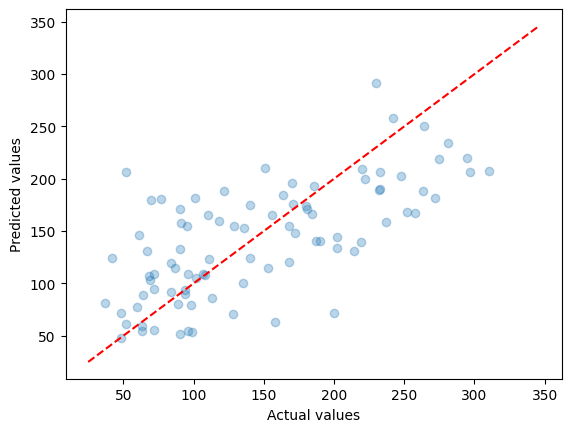

In [36]:
import matplotlib.pyplot as plt
#plot the predicted vs actual values
plt.scatter(y_test ,y_pred, alpha=0.3)
plt.plot([y.min(),y.max()],[y.min(),y.max()],'r--')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

Text(0, 0.5, 'Predicted values')

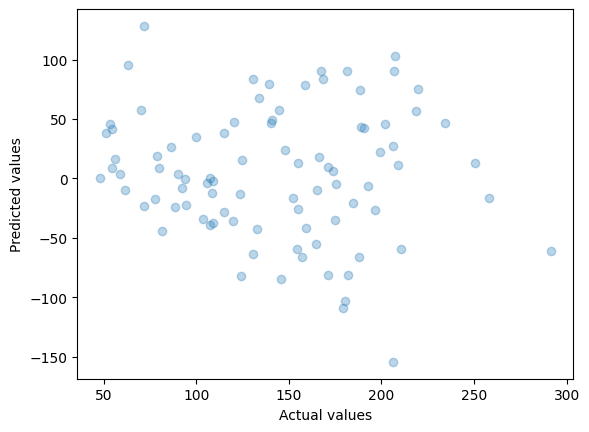

In [46]:
#Plot the residuals
plt.scatter(y_pred ,y_test-y_pred, alpha=0.3)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")